# Import libraries

The required libraries for this notebook are imported as follows:

In [3]:
# Importing the libraries
import numpy as np
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score
import pandas as pd
import os
from skimage.io import imread, imshow


# Load the data

In [2]:
# Path to all images
basedir = './dataset'
images_dir = os.path.join(basedir,'image')
labels_filename = 'label.csv'

###sil her sey calisinca
img = imread('/Users/incimaykanat/Desktop/Desktop – İncim’s MacBook Pro (164)/AMLS_COURSEWORK/dataset/image/IMAGE_0001.jpg', as_gray=True)

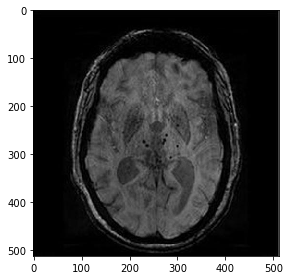

In [3]:
imshow(img)

# Extracting Features and Labels for Each Image

In [5]:
image_paths = [os.path.join(images_dir, l) for l in os.listdir(images_dir)]
target_size = None
labels_file = open(os.path.join(basedir, labels_filename), 'r')
lines = labels_file.readlines()
tumor_labels = {line.split(',')[0] : (line.split(',')[1]) for line in lines[1:]}
    
for i in tumor_labels:
    tumor_labels[i] = tumor_labels[i].replace('\n', '')
    if tumor_labels[i] == "no_tumor":
        tumor_labels[i] = 0
    else:
        tumor_labels[i] = 1
        
print(tumor_labels)  
    
 



{'IMAGE_0000.jpg': 1, 'IMAGE_0001.jpg': 0, 'IMAGE_0002.jpg': 1, 'IMAGE_0003.jpg': 1, 'IMAGE_0004.jpg': 1, 'IMAGE_0005.jpg': 1, 'IMAGE_0006.jpg': 0, 'IMAGE_0007.jpg': 1, 'IMAGE_0008.jpg': 1, 'IMAGE_0009.jpg': 1, 'IMAGE_0010.jpg': 1, 'IMAGE_0011.jpg': 1, 'IMAGE_0012.jpg': 1, 'IMAGE_0013.jpg': 1, 'IMAGE_0014.jpg': 1, 'IMAGE_0015.jpg': 1, 'IMAGE_0016.jpg': 1, 'IMAGE_0017.jpg': 1, 'IMAGE_0018.jpg': 1, 'IMAGE_0019.jpg': 0, 'IMAGE_0020.jpg': 0, 'IMAGE_0021.jpg': 1, 'IMAGE_0022.jpg': 1, 'IMAGE_0023.jpg': 1, 'IMAGE_0024.jpg': 1, 'IMAGE_0025.jpg': 1, 'IMAGE_0026.jpg': 1, 'IMAGE_0027.jpg': 0, 'IMAGE_0028.jpg': 1, 'IMAGE_0029.jpg': 1, 'IMAGE_0030.jpg': 1, 'IMAGE_0031.jpg': 1, 'IMAGE_0032.jpg': 1, 'IMAGE_0033.jpg': 1, 'IMAGE_0034.jpg': 1, 'IMAGE_0035.jpg': 1, 'IMAGE_0036.jpg': 0, 'IMAGE_0037.jpg': 1, 'IMAGE_0038.jpg': 1, 'IMAGE_0039.jpg': 1, 'IMAGE_0040.jpg': 1, 'IMAGE_0041.jpg': 1, 'IMAGE_0042.jpg': 0, 'IMAGE_0043.jpg': 1, 'IMAGE_0044.jpg': 1, 'IMAGE_0045.jpg': 1, 'IMAGE_0046.jpg': 1, 'IMAGE_0047.

In [6]:
def extract_features_labels():
    if os.path.isdir(images_dir):
        all_features = []
        all_labels = []
        for img_path in image_paths:
            file_name = img_path.split('/')[-1]

            # load image
            img = imread(img_path, as_gray = True)
            features = np.reshape(img, (512*512))
            features.shape, features
            
            if features is not None:
                all_features.append(features)
                all_labels.append(tumor_labels[file_name])

    np_features = np.array(all_features)
    np_labels = np.array(all_labels) 
    return np_features, np_labels




In [8]:
###### IS THIS NORMAL


print(all_labels)




NameError: name 'all_labels' is not defined

In [21]:
####SIL


np_features = np.array(all_features)
np_labels = np.array(all_labels)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:

X, y = extract_features_labels()

shape.y

Y = np.array([y, -(y - 1)]).T
tr_X = X[:2400]
tr_Y = Y[:2400]
te_X = X[2400:]
te_Y = Y[2400:]


In [9]:
classifier = svm.SVC(kernel='linear')

classifier.fit(tr_X, list(zip(*tr_Y))[0])

pred=classifier.predict(te_X)

print(pred)

print("Accuracy:", accuracy_score(list(zip(*te_Y))[0], pred))



    

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 0 